## Observations and Insights 

Observation 1: Summary Statistics 
Ramicane has the lowest mean and median out of all the Drug Regimens with a STD of 4.85.
Ketapril has the highest mean and median of all the Drug Regimens with a STD of 8.28.
The placebo ranks 4th in the mean and median with a STD of 7.82.

Observation 2: Bar and Pie Charts
Capomulin has the highest number of timepoints with Ramicane coming in second.
Propriva has the lowest amount of timepoints.
Male mice are at 50.4% with Female mice at 49.6%. 

Observation 3: Quartiles and Outliers 
The boxplot for Infubinol denotes a potential outlier. 
The lower quartile of the drug list is: 31.56046955
The upper quartile of the drug is: 40.65900627
Values below the 17.912664470000003 could be outliers.
Values above the 54.30681135 could be outliers.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm_data = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID", "Mouse ID"])
pharm_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice = pharm_data.groupby("Mouse ID")["Mouse ID"]
len(mice)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = pharm_data.groupby(["Mouse ID","Timepoint"]).size().reset_index(name = "Total")

In [5]:
dupe_mouse = dupe[dupe["Total"]>1]["Mouse ID"].unique()[0]
dupe_mouse

'g989'

In [6]:
clean_df = pharm_data[pharm_data["Mouse ID"]!= dupe_mouse]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
len(clean_df.groupby("Mouse ID")["Mouse ID"])

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame()
grouped = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
summary_df["mean"]= round(grouped.mean(),2)
summary_df["median"]= round(grouped.median(),2)
summary_df["var"]= round(grouped.var(),2)
summary_df["std"]= round(grouped.std(),2)
summary_df["sem"]= round(grouped.sem(),2)
summary_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]).round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:>

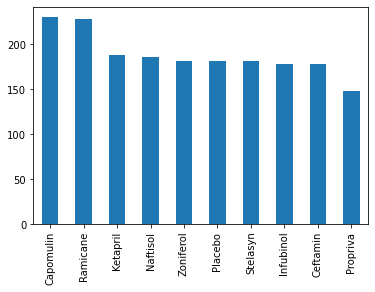

In [10]:
#pandas plot example
clean_df["Drug Regimen"].value_counts().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

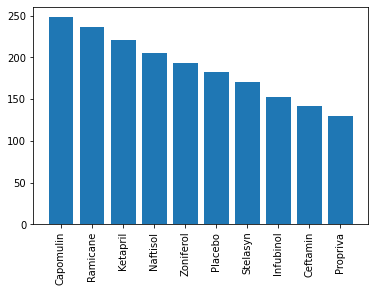

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x = clean_df["Timepoint"].value_counts().values
y = clean_df["Drug Regimen"].value_counts().index
plt.bar(y,x)
plt.xticks(rotation= 90)

In [13]:
Sex = clean_df.groupby("Sex").nunique()
Sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,123,10,24,14,10,800,5
Male,125,10,24,14,10,834,5


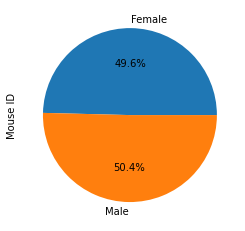

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex['Mouse ID'].plot(kind = "pie", autopct='%1.1f%%')
plt.show()


Text(0, 0.5, 'Mouse ID')

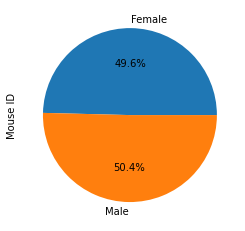

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Sex["Mouse ID"],labels = ["Female","Male"], autopct='%1.1f%%')
plt.ylabel("Mouse ID")


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Drug_list = ['Capomulin', 'Ceftamin','Infubinol', 'Ramicane']

# Start by getting the last (greatest) timepoint for each mouse
DF = clean_df.groupby('Mouse ID').max()
TP_df = pd.DataFrame(DF['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, TP_df, on = ['Mouse ID', 'Timepoint'])
drug_f = merge_df.set_index('Drug Regimen')
loc_drugs = drug_f.loc[Drug_list]
loc_drugs

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Capomulin,f966,Male,16,17,20,30.485985,0
Capomulin,u364,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...
Ramicane,q597,Male,20,25,45,45.220869,2
Ramicane,a444,Female,10,25,45,43.047543,0
Ramicane,r921,Female,5,25,30,43.419381,1


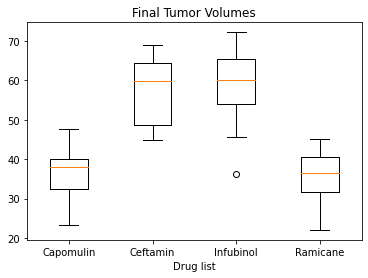

In [17]:
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
Drug_list = ['Capomulin', 'Ceftamin','Infubinol', 'Ramicane']
Tumor = []
for drug in Drug_list:
    key = loc_drugs.index == drug
    df = loc_drugs[key]
    t_vol = df['Tumor Volume (mm3)']
    Tumor.append(t_vol)
plt.boxplot(Tumor)   
plt.title('Final Tumor Volumes')
plt.xlabel('Drug list')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ceftamin','Infubinol', 'Ramicane'])
plt.show()

In [42]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = t_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of the drug list is: {lowerq}")
print(f"The upper quartile of the drug is: {upperq}")
print(f"Values below the {lower_bound} could be outliers.")
print(f"Values above the {upper_bound} could be outliers.")

The lower quartile of the drug list is: 31.56046955
The upper quartile of the drug is: 40.65900627
Values below the 17.912664470000003 could be outliers.
Values above the 54.30681135 could be outliers.


## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# find a mouse with all the timepoints: s185 Capomulin
# tumor volumes and Capomulin
s185 = clean_df.loc[(clean_df["Mouse ID"] == "s185")]
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

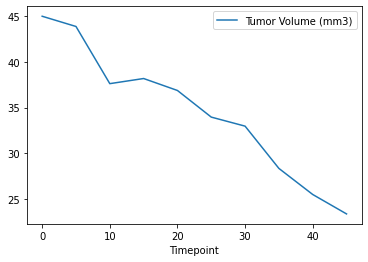

In [27]:
Selected_mouse = s185.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title(Timepoint v.s. Tumor Volume for Capomulin Treatment)
plt.savefig("../Images/")

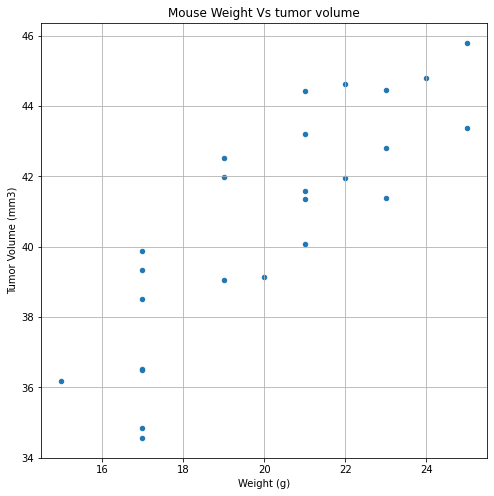

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mean_1 = capomulin_treatment.groupby('Mouse ID').mean()
weight_tv = mean_1.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Mouse Weight Vs tumor volume")
plt.show()

## Correlation and Regression

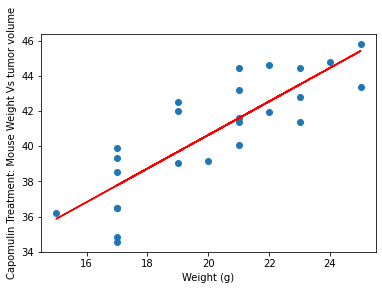

In [40]:
# Calculate the correlation coefficient and linear regression model 
from scipy.stats import linregress
capomulin_treatment = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mean_1 = capomulin_treatment.groupby('Mouse ID').mean()
x_values = mean_1['Weight (g)']
y_values = mean_1['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Capomulin Treatment: Mouse Weight Vs tumor volume')
plt.show()